In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. Loading dataset

In [22]:
df=pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Data preprocessing and visualization

In [23]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

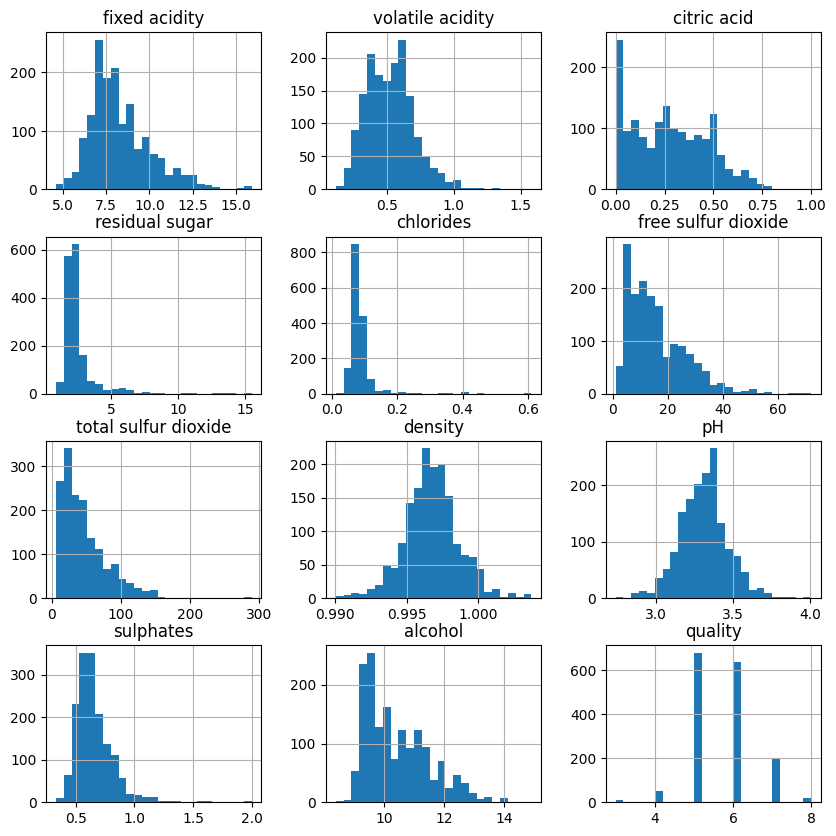

In [25]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

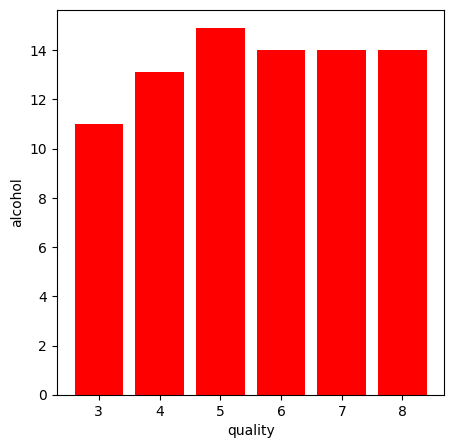

In [26]:
plt.figure(figsize=[5,5])
plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

<Axes: >

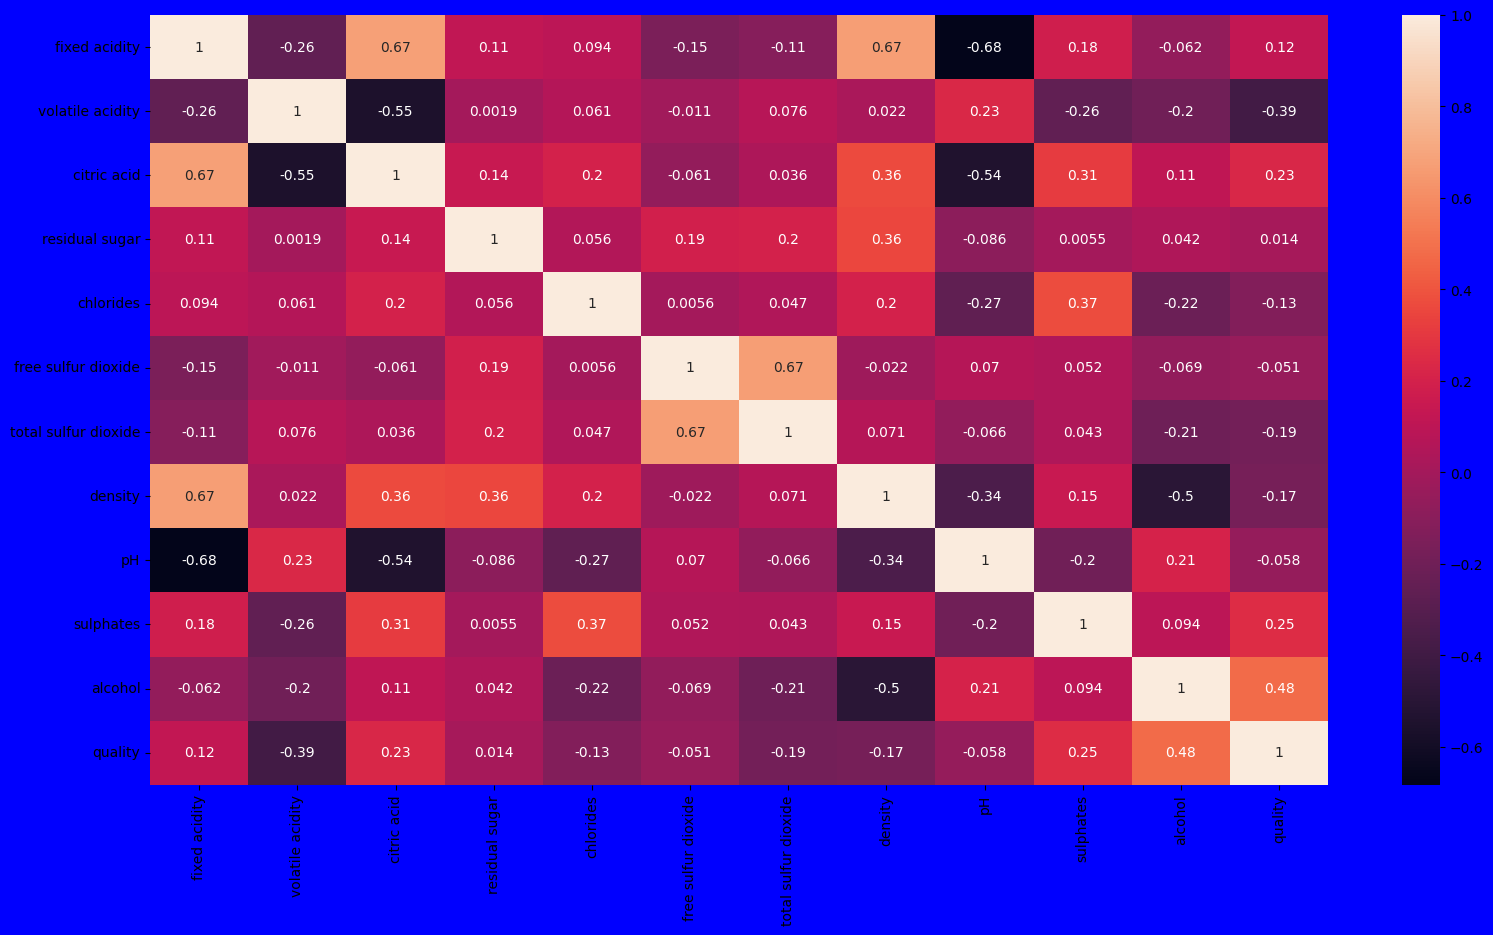

In [27]:
plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(df.corr(),annot=True)

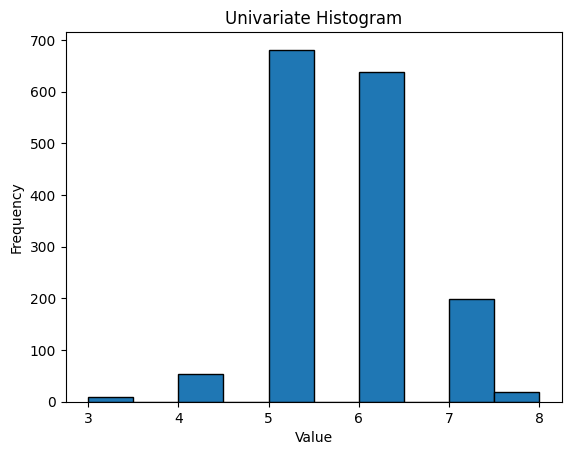

In [29]:
plt.hist(df['quality'], bins=10, edgecolor='k')  

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Univariate Histogram')

plt.show()


In [31]:
df["best quality"] = [ 1 if x>=6 else 0 for x in df.quality]
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [38]:
df.drop('quality',axis=1,inplace=True)

Data split

In [39]:
x = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

x = x.to_numpy()
y = y.to_numpy()

In [40]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [41]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [43]:
x_train

array([[ 8.4  ,  0.62 ,  0.12 , ...,  3.38 ,  0.89 , 11.8  ],
       [ 8.6  ,  0.645,  0.25 , ...,  3.28 ,  0.6  , 10.   ],
       [10.   ,  0.35 ,  0.45 , ...,  3.15 ,  0.43 ,  9.4  ],
       ...,
       [ 7.3  ,  0.65 ,  0.   , ...,  3.39 ,  0.47 , 10.   ],
       [ 7.8  ,  0.53 ,  0.33 , ...,  3.3  ,  0.6  ,  9.5  ],
       [ 9.   ,  0.6  ,  0.29 , ...,  3.34 ,  0.57 , 10.   ]])

Machine Learning model building

In [71]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
print(new_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


RandomForestClassifier:-

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rnd = RandomForestClassifier()
fit_rnd = rnd.fit(new_xtrain,y_train)


In [75]:
new_xtrain.shape

(1279, 11)

Logistic Regression:-

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating model

RandomForestClassification score

In [83]:
# predicting score
rnd_score = rnd.score(new_xtest,y_test)
print('score of model is : ',rnd_score)

score of model is :  0.859375


Logistic Regression: score-

In [84]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.771875
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       147
           1       0.79      0.79      0.79       173

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [85]:
from sklearn.metrics import mean_squared_error
print('calculating the error')
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print('mean squared error is : ',MSE)
print('root mean squared error is : ',RMSE)
print(classification_report(y_pred,y_test))

calculating the error
mean squared error is :  0.228125
root mean squared error is :  0.47762432936357
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       146
           1       0.79      0.79      0.79       174

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



Random Forest Classification gave 86% accuracy whereas Logistic Regression gave 77% accuracy.

Testing with random observation.

In [89]:
random_observation = np.array([[8.1,0.79,0.02,1.3,0.076,25.0,68.0,0.88,3.4,0.56,0.90]])
predicted_class = model.predict(random_observation)  #Logistic Regression
print("Predicted Class:", predicted_class[0])

Predicted Class: 0


In [88]:
random_observation = np.array([[8.1,0.79,0.02,1.3,0.076,25.0,68.0,0.88,3.4,0.56,0.90]])
predicted_class =rnd.predict(random_observation)  #Random forest classification
print("Predicted Class:", predicted_class[0])

Predicted Class: 0
